ECGR 4105 Intro to Machine Learning Project | Khang Vu

The Effects of Alcohol on Studying

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch
import imageio
import torch.optim as optim
import torch.nn as nn
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression 
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms

In [ ]:
file_path1 = '/content/drive/MyDrive/Machine Learning/Maths.csv'
math = pd.DataFrame(pd.read_csv(file_path1))
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
file_path2 = '/content/drive/MyDrive/Machine Learning/Portuguese.csv'
port = pd.DataFrame(pd.read_csv(file_path2))
port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
#need to clean up dataset
def clean_data(df):
    temp = df
    x = df.columns.tolist()   #turns the column titles into a list
    types = df.dtypes           #returns the type of each column
    for i in range(len(x)):
        if types[i] == 'str' or types[i] == 'object':
            temp[x[i]] = df[x[i]].astype('category').cat.codes
        else: 
            temp[x[i]] = df[x[i]]
    return temp

In [ ]:
math = clean_data(math)
port = clean_data(port)

math.shape

(395, 33)

In [ ]:
math.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
math.describe().T

,count,mean,std,min,25%,50%,75%,max
school,395.0,0.116456,0.321177,0.0,0.0,0.0,0.0,1.0
sex,395.0,0.473418,0.499926,0.0,0.0,0.0,1.0,1.0
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395.0,0.777215,0.416643,0.0,1.0,1.0,1.0,1.0
famsize,395.0,0.288608,0.453690,0.0,0.0,0.0,1.0,1.0
Pstatus,395.0,0.896203,0.305384,0.0,1.0,1.0,1.0,1.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395.0,2.169620,1.227473,0.0,2.0,2.0,3.0,4.0
Fjob,395.0,2.281013,0.863542,0.0,2.0,2.0,3.0,4.0


In [ ]:
math.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [ ]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int8 
 1   sex         395 non-null    int8 
 2   age         395 non-null    int64
 3   address     395 non-null    int8 
 4   famsize     395 non-null    int8 
 5   Pstatus     395 non-null    int8 
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int8 
 9   Fjob        395 non-null    int8 
 10  reason      395 non-null    int8 
 11  guardian    395 non-null    int8 
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int8 
 16  famsup      395 non-null    int8 
 17  paid        395 non-null    int8 
 18  activities  395 non-null    int8 
 19  nursery     395 non-null    int8 
 20  higher      395 non-null    int8

In [ ]:
math.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
varlist =  ['age', 'sex', 'studytime', 'famsup', 'paid', 'activities', 'higher', 'internet', 'Dalc', 'Walc', 'absences', 'G3'] 
math = math[varlist] 
math.head() 

,age,sex,studytime,famsup,paid,activities,higher,internet,Dalc,Walc,absences,G3
0,18,0,2,0,0,0,1,0,1,1,6,6
1,17,0,2,1,0,0,1,1,1,1,4,6
2,15,0,2,0,1,0,1,1,2,3,10,10
3,15,0,3,1,1,1,1,1,1,1,2,15
4,16,0,2,1,1,0,1,0,1,2,4,10


In [ ]:
port = port[varlist]
port.head()

,age,sex,studytime,famsup,paid,activities,higher,internet,Dalc,Walc,absences,G3
0,18,0,2,0,0,0,1,0,1,1,4,11
1,17,0,2,1,0,0,1,1,1,1,2,11
2,15,0,2,0,0,0,1,1,2,3,6,12
3,15,0,3,1,0,1,1,1,1,1,0,14
4,16,0,2,1,0,0,1,0,1,2,0,13


In [ ]:
#Splitting the Data into Training and Testing Sets 
from sklearn.model_selection import train_test_split 
 
# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0) 
math_train, math_test = train_test_split(math, train_size = 0.8, test_size = 0.2, random_state=0)
port_train, port_test = train_test_split(port, train_size = 0.8, test_size = 0.2, random_state=0)

math_train.shape

(316, 12)

In [ ]:
math_test.shape 

(79, 12)

In [ ]:
num_vars = ['age', 'sex', 'studytime', 'famsup', 'paid', 'activities', 'higher', 'internet', 'Dalc', 'Walc', 'absences', 'G3'] 
math_Newtrain = math_train[num_vars] 
math_Newtest = math_test[num_vars] 
math_Newtrain.head() 

,age,sex,studytime,famsup,paid,activities,higher,internet,Dalc,Walc,absences,G3
64,15,0,2,0,0,1,1,1,2,4,0,10
55,16,0,2,0,1,1,1,1,1,1,8,10
343,17,0,2,1,0,0,1,1,1,2,0,0
219,17,0,3,1,1,1,1,1,1,1,4,10
366,18,1,3,0,1,0,1,1,2,2,0,13


In [ ]:
port_Newtrain = port_train[num_vars] 
port_Newtest = port_test[num_vars] 
port_Newtrain.head() 

,age,sex,studytime,famsup,paid,activities,higher,internet,Dalc,Walc,absences,G3
34,16,1,1,1,0,0,1,1,1,1,4,12
432,17,0,1,1,0,0,0,1,2,2,0,7
399,18,0,3,0,0,0,1,1,2,3,4,17
346,17,1,1,0,0,0,1,1,2,2,0,13
542,16,0,3,1,0,0,1,1,1,4,1,12


In [ ]:
math_Newtrain.shape 

(316, 12)

In [ ]:
#Here we can see that except for area, all the columns have small integer values.  
#So it is extremely important to rescale the variables so that they have a comparable s
#If we don't have comparable scales, then some of the coefficients as obtained by fitti
#This might become very annoying at the time of model evaluation.  
##So it is advised to use standardization or normalization so that the units of the coef
 
#As you know, there are two common ways of rescaling:
#1. Min-Max scaling 
#2. Standardisation (mean-0, sigma-1) 
 
import warnings 
warnings.filterwarnings('ignore') 
 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
 
# define standard scaler 
#scaler = StandardScaler() 
scaler = MinMaxScaler() 
math_Newtrain[num_vars] = scaler.fit_transform(math_Newtrain[num_vars])
math_Newtest[num_vars] = scaler.fit_transform(math_Newtest[num_vars])
math_Newtrain.head(20) 

,age,sex,studytime,famsup,paid,activities,higher,internet,Dalc,Walc,absences,G3
181,0.142857,1.0,0.333333,0.0,1.0,1.0,1.0,1.0,0.00,0.25,0.026667,0.60
194,0.142857,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.00,0.00,0.000000,0.70
173,0.142857,0.0,0.333333,0.0,0.0,1.0,1.0,1.0,0.00,0.00,0.000000,0.00
63,0.142857,0.0,0.666667,1.0,1.0,1.0,1.0,1.0,0.25,0.75,0.026667,0.45
253,0.142857,1.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.00,0.50,0.000000,0.40
225,0.428571,0.0,0.333333,0.0,0.0,1.0,1.0,1.0,0.00,0.00,0.213333,0.35
331,0.285714,0.0,0.666667,1.0,0.0,0.0,1.0,1.0,0.00,0.00,0.093333,0.70
383,0.571429,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.00,0.50,0.000000,0.00
227,0.285714,1.0,0.333333,1.0,1.0,0.0,1.0,1.0,0.00,0.50,0.026667,0.60
342,0.428571,1.0,0.333333,0.0,0.0,1.0,1.0,1.0,0.00,0.50,0.146667,0.75


In [ ]:
port_Newtrain[num_vars] = scaler.fit_transform(port_Newtrain[num_vars])
port_Newtest[num_vars] = scaler.fit_transform(port_Newtest[num_vars])
port_Newtrain.head(20) 

,age,sex,studytime,famsup,paid,activities,higher,internet,Dalc,Walc,absences,G3
34,0.142857,1.0,0.000000,1.0,0.0,0.0,1.0,1.0,0.00,0.00,0.12500,0.631579
432,0.285714,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.25,0.25,0.00000,0.368421
399,0.428571,0.0,0.666667,0.0,0.0,0.0,1.0,1.0,0.25,0.50,0.12500,0.894737
346,0.285714,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.25,0.00000,0.684211
542,0.142857,0.0,0.666667,1.0,0.0,0.0,1.0,1.0,0.00,0.75,0.03125,0.631579
601,0.428571,0.0,0.333333,1.0,0.0,0.0,1.0,1.0,0.00,0.00,0.12500,0.526316
440,0.142857,1.0,0.333333,1.0,0.0,1.0,1.0,0.0,0.75,1.00,0.00000,0.000000
640,0.428571,1.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.75,0.50,0.00000,0.000000
12,0.000000,1.0,0.000000,1.0,0.0,1.0,1.0,1.0,0.00,0.50,0.00000,0.631579
144,0.142857,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.00,0.25,0.25000,0.578947


In [ ]:
#math
y_Newtrain_math = math_Newtrain.pop('G3') 
x_Newtrain_math = math_Newtrain
y_Newtest_math = math_Newtest.pop('G3')
x_Newtest_math = math_Newtest

#portuguese
y_Newtrain_port = port_Newtrain.pop('G3')
x_Newtrain_port = port_Newtrain
y_Newtest_port = port_Newtest.pop('G3')
x_Newtest_port = port_Newtest

In [ ]:
#math
y_Newtrain_math = torch.tensor(y_Newtrain_math.values).float()
y_Newtrain_math = y_Newtrain_math[:,None]
x_Newtrain_math = torch.tensor(x_Newtrain_math.values).float()
y_Newtest_math = torch.tensor(y_Newtest_math.values).float()
y_Newtest_math = y_Newtest_math[:,None]
x_Newtest_math = torch.tensor(x_Newtest_math.values).float()

#portuguese
y_Newtrain_port = torch.tensor(y_Newtrain_port.values).float()
y_Newtrain_port = y_Newtrain_port[:,None]
x_Newtrain_port = torch.tensor(x_Newtrain_port.values).float()
y_Newtest_port = torch.tensor(y_Newtest_port.values).float()
y_Newtest_port = y_Newtest_port[:,None]
x_Newtest_port = torch.tensor(x_Newtest_port.values).float()

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) 
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) 
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 10 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [ ]:
seq_model1 = nn.Sequential(
    nn.Linear(11,316),
    nn.Tanh(),
    nn.Linear(316,532),
    nn.Tanh(),
    nn.Linear(532,624),
    nn.Tanh(),
    nn.Linear(624,800),
    nn.Tanh(),
    nn.Linear(800, 11))
seq_model1

Sequential(
  (0): Linear(in_features=11, out_features=316, bias=True)
  (1): Tanh()
  (2): Linear(in_features=316, out_features=532, bias=True)
  (3): Tanh()
  (4): Linear(in_features=532, out_features=624, bias=True)
  (5): Tanh()
  (6): Linear(in_features=624, out_features=800, bias=True)
  (7): Tanh()
  (8): Linear(in_features=800, out_features=11, bias=True)
)

In [ ]:
#math
optimizer = optim.SGD(seq_model1.parameters(), lr=1e-3)
training_loop(200, optimizer, seq_model1, nn.MSELoss(), x_Newtrain_math, x_Newtest_math, y_Newtrain_math, y_Newtest_math)

Epoch 1, Training loss 129.5910, Validation loss 131.7736
Epoch 10, Training loss 115.3721, Validation loss 117.9864
Epoch 20, Training loss 81.5908, Validation loss 85.4617
Epoch 30, Training loss 40.3477, Validation loss 46.3637
Epoch 40, Training loss 23.3821, Validation loss 30.9018
Epoch 50, Training loss 19.8508, Validation loss 28.0455
Epoch 60, Training loss 19.2921, Validation loss 27.7450
Epoch 70, Training loss 19.2079, Validation loss 27.7508
Epoch 80, Training loss 19.1915, Validation loss 27.7609
Epoch 90, Training loss 19.1845, Validation loss 27.7573
Epoch 100, Training loss 19.1788, Validation loss 27.7469
Epoch 110, Training loss 19.1735, Validation loss 27.7340
Epoch 120, Training loss 19.1682, Validation loss 27.7202
Epoch 130, Training loss 19.1629, Validation loss 27.7064
Epoch 140, Training loss 19.1577, Validation loss 27.6926
Epoch 150, Training loss 19.1524, Validation loss 27.6789
Epoch 160, Training loss 19.1471, Validation loss 27.6653
Epoch 170, Training l

In [ ]:
#portuguese
optimizer = optim.SGD(seq_model1.parameters(), lr=1e-3)
training_loop(200, optimizer, seq_model1, nn.MSELoss(), x_Newtrain_port, x_Newtest_port, y_Newtrain_port, y_Newtest_port)

Epoch 1, Training loss 7.8353, Validation loss 9.7247
Epoch 10, Training loss 1.2653, Validation loss 2.1583
Epoch 20, Training loss 0.7151, Validation loss 1.2843
Epoch 30, Training loss 0.6244, Validation loss 1.1000
Epoch 40, Training loss 0.5718, Validation loss 1.0106
Epoch 50, Training loss 0.5293, Validation loss 0.9463
Epoch 60, Training loss 0.4933, Validation loss 0.8932
Epoch 70, Training loss 0.4624, Validation loss 0.8471
Epoch 80, Training loss 0.4355, Validation loss 0.8062
Epoch 90, Training loss 0.4120, Validation loss 0.7695
Epoch 100, Training loss 0.3911, Validation loss 0.7364
Epoch 110, Training loss 0.3725, Validation loss 0.7062
Epoch 120, Training loss 0.3557, Validation loss 0.6786
Epoch 130, Training loss 0.3405, Validation loss 0.6532
Epoch 140, Training loss 0.3267, Validation loss 0.6297
Epoch 150, Training loss 0.3141, Validation loss 0.6079
Epoch 160, Training loss 0.3024, Validation loss 0.5877
Epoch 170, Training loss 0.2917, Validation loss 0.5687
Epo

Trying again with just alcohol features and grades

In [ ]:
varlist =  ['Dalc', 'Walc', 'G3'] 
math = math[varlist] 
math.head() 

,Dalc,Walc,G3
0,1,1,6
1,1,1,6
2,2,3,10
3,1,1,15
4,1,2,10


In [ ]:
port = port[varlist]
port.head()

,Dalc,Walc,G3
0,1,1,11
1,1,1,11
2,2,3,12
3,1,1,14
4,1,2,13


In [ ]:
#Splitting the Data into Training and Testing Sets 
from sklearn.model_selection import train_test_split 
 
# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0) 
math_train, math_test = train_test_split(math, train_size = 0.8, test_size = 0.2, random_state=0)
port_train, port_test = train_test_split(port, train_size = 0.8, test_size = 0.2, random_state=0)

math_train.shape

(316, 3)

In [ ]:
num_vars = ['Dalc', 'Walc', 'G3'] 
math_Newtrain = math_train[num_vars] 
math_Newtest = math_test[num_vars] 
math_Newtrain.head() 

,Dalc,Walc,G3
64,2,4,10
55,1,1,10
343,1,2,0
219,1,1,10
366,2,2,13


In [ ]:
port_Newtrain = port_train[num_vars] 
port_Newtest = port_test[num_vars] 
port_Newtrain.head() 

,Dalc,Walc,G3
34,1,1,12
432,2,2,7
399,2,3,17
346,2,2,13
542,1,4,12


In [ ]:
#Here we can see that except for area, all the columns have small integer values.  
#So it is extremely important to rescale the variables so that they have a comparable s
#If we don't have comparable scales, then some of the coefficients as obtained by fitti
#This might become very annoying at the time of model evaluation.  
##So it is advised to use standardization or normalization so that the units of the coef
 
#As you know, there are two common ways of rescaling:
#1. Min-Max scaling 
#2. Standardisation (mean-0, sigma-1) 
 
import warnings 
warnings.filterwarnings('ignore') 
 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
 
# define standard scaler 
#scaler = StandardScaler() 
scaler = MinMaxScaler() 
math_Newtrain[num_vars] = scaler.fit_transform(math_Newtrain[num_vars])
math_Newtest[num_vars] = scaler.fit_transform(math_Newtest[num_vars])
math_Newtrain.head(20) 

,Dalc,Walc,G3
64,0.25,0.75,0.50
55,0.00,0.00,0.50
343,0.00,0.25,0.00
219,0.00,0.00,0.50
366,0.25,0.25,0.65
368,0.00,0.25,0.50
319,0.50,0.50,0.55
301,0.25,0.25,0.50
56,0.00,0.00,0.75
8,0.00,0.00,0.95


In [ ]:
port_Newtrain[num_vars] = scaler.fit_transform(port_Newtrain[num_vars])
port_Newtest[num_vars] = scaler.fit_transform(port_Newtest[num_vars])
port_Newtrain.head(20) 

,Dalc,Walc,G3
34,0.00,0.00,0.631579
432,0.25,0.25,0.368421
399,0.25,0.50,0.894737
346,0.25,0.25,0.684211
542,0.00,0.75,0.631579
601,0.00,0.00,0.526316
440,0.75,1.00,0.000000
640,0.75,0.50,0.000000
12,0.00,0.50,0.631579
144,0.00,0.25,0.578947


In [ ]:
#math
y_Newtrain_math = math_Newtrain.pop('G3') 
x_Newtrain_math = math_Newtrain
y_Newtest_math = math_Newtest.pop('G3')
x_Newtest_math = math_Newtest

#portuguese
y_Newtrain_port = port_Newtrain.pop('G3')
x_Newtrain_port = port_Newtrain
y_Newtest_port = port_Newtest.pop('G3')
x_Newtest_port = port_Newtest

In [ ]:
#math
y_Newtrain_math = torch.tensor(y_Newtrain_math.values).float()
y_Newtrain_math = y_Newtrain_math[:,None]
x_Newtrain_math = torch.tensor(x_Newtrain_math.values).float()
y_Newtest_math = torch.tensor(y_Newtest_math.values).float()
y_Newtest_math = y_Newtest_math[:,None]
x_Newtest_math = torch.tensor(x_Newtest_math.values).float()

#portuguese
y_Newtrain_port = torch.tensor(y_Newtrain_port.values).float()
y_Newtrain_port = y_Newtrain_port[:,None]
x_Newtrain_port = torch.tensor(x_Newtrain_port.values).float()
y_Newtest_port = torch.tensor(y_Newtest_port.values).float()
y_Newtest_port = y_Newtest_port[:,None]
x_Newtest_port = torch.tensor(x_Newtest_port.values).float()

In [ ]:
seq_model1 = nn.Sequential(
    nn.Linear(2,316),
    nn.Tanh(),
    nn.Linear(316,532),
    nn.Tanh(),
    nn.Linear(532,624),
    nn.Tanh(),
    nn.Linear(624,800),
    nn.Tanh(),
    nn.Linear(800, 2))
seq_model1

Sequential(
  (0): Linear(in_features=2, out_features=316, bias=True)
  (1): Tanh()
  (2): Linear(in_features=316, out_features=532, bias=True)
  (3): Tanh()
  (4): Linear(in_features=532, out_features=624, bias=True)
  (5): Tanh()
  (6): Linear(in_features=624, out_features=800, bias=True)
  (7): Tanh()
  (8): Linear(in_features=800, out_features=2, bias=True)
)

In [ ]:
#math
optimizer = optim.SGD(seq_model1.parameters(), lr=1e-3)
training_loop(200, optimizer, seq_model1, nn.MSELoss(), x_Newtrain_math, x_Newtest_math, y_Newtrain_math, y_Newtest_math)

Epoch 1, Training loss 0.3550, Validation loss 0.3990
Epoch 10, Training loss 0.2878, Validation loss 0.3300
Epoch 20, Training loss 0.2299, Validation loss 0.2703
Epoch 30, Training loss 0.1856, Validation loss 0.2243
Epoch 40, Training loss 0.1515, Validation loss 0.1888
Epoch 50, Training loss 0.1255, Validation loss 0.1615
Epoch 60, Training loss 0.1057, Validation loss 0.1405
Epoch 70, Training loss 0.0907, Validation loss 0.1246
Epoch 80, Training loss 0.0796, Validation loss 0.1125
Epoch 90, Training loss 0.0713, Validation loss 0.1035
Epoch 100, Training loss 0.0651, Validation loss 0.0967
Epoch 110, Training loss 0.0606, Validation loss 0.0916
Epoch 120, Training loss 0.0573, Validation loss 0.0878
Epoch 130, Training loss 0.0550, Validation loss 0.0850
Epoch 140, Training loss 0.0533, Validation loss 0.0829
Epoch 150, Training loss 0.0520, Validation loss 0.0814
Epoch 160, Training loss 0.0511, Validation loss 0.0803
Epoch 170, Training loss 0.0505, Validation loss 0.0794
Epo

In [ ]:
#portuguese
optimizer = optim.SGD(seq_model1.parameters(), lr=1e-3)
training_loop(200, optimizer, seq_model1, nn.MSELoss(), x_Newtrain_port, x_Newtest_port, y_Newtrain_port, y_Newtest_port)

Epoch 1, Training loss 0.0471, Validation loss 0.0529
Epoch 10, Training loss 0.0429, Validation loss 0.0468
Epoch 20, Training loss 0.0395, Validation loss 0.0417
Epoch 30, Training loss 0.0371, Validation loss 0.0378
Epoch 40, Training loss 0.0354, Validation loss 0.0349
Epoch 50, Training loss 0.0342, Validation loss 0.0326
Epoch 60, Training loss 0.0333, Validation loss 0.0309
Epoch 70, Training loss 0.0327, Validation loss 0.0296
Epoch 80, Training loss 0.0323, Validation loss 0.0286
Epoch 90, Training loss 0.0320, Validation loss 0.0278
Epoch 100, Training loss 0.0318, Validation loss 0.0272
Epoch 110, Training loss 0.0316, Validation loss 0.0267
Epoch 120, Training loss 0.0315, Validation loss 0.0263
Epoch 130, Training loss 0.0314, Validation loss 0.0260
Epoch 140, Training loss 0.0313, Validation loss 0.0257
Epoch 150, Training loss 0.0313, Validation loss 0.0255
Epoch 160, Training loss 0.0312, Validation loss 0.0254
Epoch 170, Training loss 0.0311, Validation loss 0.0252
Epo



---


Linear Regression


---





In [ ]:
def compute_loss (X, Y, theta, examples):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * examples) * np.sum(sqrErrors)
  return J

In [ ]:
def gradient_descent(X, Y, theta, examples, alpha, iterations):
  loss_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (alpha/examples) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    loss_history[i] = compute_loss(X,Y,theta,examples)

  return theta, loss_history

In [ ]:
file_path1 = '/content/drive/MyDrive/Machine Learning/Maths.csv'
math = pd.DataFrame(pd.read_csv(file_path1))
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
file_path2 = '/content/drive/MyDrive/Machine Learning/Portuguese.csv'
port = pd.DataFrame(pd.read_csv(file_path2))
port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
#need to clean up dataset
def clean_data(df):
    temp = df
    x = df.columns.tolist()   #turns the column titles into a list
    types = df.dtypes           #returns the type of each column
    for i in range(len(x)):
        if types[i] == 'str' or types[i] == 'object':
            temp[x[i]] = df[x[i]].astype('category').cat.codes
        else: 
            temp[x[i]] = df[x[i]]
    return temp

In [ ]:
math = clean_data(math)
port = clean_data(port)

math.shape

(395, 33)

In [ ]:
math.describe().T

,count,mean,std,min,25%,50%,75%,max
school,395.0,0.116456,0.321177,0.0,0.0,0.0,0.0,1.0
sex,395.0,0.473418,0.499926,0.0,0.0,0.0,1.0,1.0
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395.0,0.777215,0.416643,0.0,1.0,1.0,1.0,1.0
famsize,395.0,0.288608,0.453690,0.0,0.0,0.0,1.0,1.0
Pstatus,395.0,0.896203,0.305384,0.0,1.0,1.0,1.0,1.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395.0,2.169620,1.227473,0.0,2.0,2.0,3.0,4.0
Fjob,395.0,2.281013,0.863542,0.0,2.0,2.0,3.0,4.0


In [ ]:
varlist = ['Dalc', 'Walc'] 
X = math[varlist]
Y = math.iloc[:,32]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 100)

#concat 1's vector
train_in = pd.concat([pd.Series(1, index=X_train.index, name='00'), X_train], axis=1)
test_in = pd.concat([pd.Series(1,index=X_test.index, name='00'), X_test], axis =1)

theta_train = np.array([0]*len(train_in.columns))
theta_test = np.array([0]*len(test_in.columns))

train_examples = len(Y_train)
test_examples = len(Y_test)

In [ ]:
X

,Dalc,Walc
0,1,1
1,1,1
2,2,3
3,1,1
4,1,2
...,...,...
390,4,5
391,3,4
392,3,3
393,3,4


In [ ]:
Y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [ ]:
loss_train = compute_loss(train_in,Y_train,theta_train,train_examples)
loss_test = compute_loss(test_in,Y_test,theta_test,test_examples)

print("Loss for Training Set: ", loss_train)
print("Loss for Testing Set: ", loss_test)

Loss for Training Set:  64.02848101265823
Loss for Testing Set:  67.41772151898734


In [ ]:
#train
theta_train = [0.,0.,0.]
iterations = 1500;
alpha = 0.001;

theta_train, loss_train = gradient_descent(train_in, Y_train, theta_train, train_examples, alpha, iterations)
print('Final value of theta =', theta_train)

#test
theta_test = [0.,0.,0.]
iterations = 1500;
alpha = 0.001;

theta_test, loss_test = gradient_descent(test_in, Y_test, theta_test, test_examples, alpha, iterations)
print('Final value of theta =', theta_test)

Final value of theta = 00      3.421587
Dalc    1.226260
Walc    1.534700
dtype: float64
Final value of theta = 00      3.492508
Dalc    1.462925
Walc    1.720597
dtype: float64


Text(0.5, 1.0, 'Convergence of gradient descent')

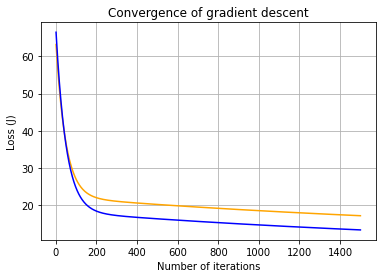

In [ ]:
plt.plot(range(1,iterations + 1), loss_train, color = 'orange')
plt.plot(range(1,iterations + 1), loss_test, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')